In [54]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("..")

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
from scipy import sparse
import pandas as pd

import paper.eval as eval
from paper.DPAH_multiple_minorities import DPAH

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## model parameters

In [55]:
# Number of nodes
N = 100

# max edge density
d = 0.0015

# Top beta% of rankings to consider for inequity
beta = 0.1

# Top k nodes to consider for inequity. k = N * beta
k = int(N * beta)

# Minority fractions
fm1 = 0.1
fm2 = 0.1

# Activity distribution parameters
plo_M = 3
plo_m1 = 3
plo_m2 = 3

# homophily
h_MM = 1/3
h_Mm = (1.0 - h_MM)/2.0
h_within = 0.7
h_between = 0.1
h_mM = (1.0 - h_within - h_between)

h = [[h_MM, h_Mm, h_Mm],
    [h_mM, h_within, h_between],
    [h_mM, h_between, h_within]]

In [56]:
def compute_inequity(g, k):
    """Compute the proportion of minorities in the top k ranks of g"""
    node_pageranks = nx.pagerank(g)
    node_pageranks_sorted = sorted(node_pageranks.items(), key=lambda x: x[1], reverse=True)
    top_k = node_pageranks_sorted[:k]
    num_top_k_minority = np.count_nonzero([g.nodes[node_id]['m'] for (node_id, _) in top_k])
    
    return num_top_k_minority / k  

## experiment parameters

In [57]:
runs = 1

## experiments

In [58]:
#graphs = []
start_time = time.time()
results =[]

t = 1

for i in range(runs):
    g = DPAH(N=N, d=d, fm1=fm1, fm2=fm2, plo_M=plo_M, plo_m1=plo_m1, plo_m2=plo_m2, h=h, verbose=False, seed=i)
    node_identities = [[node_id,g.nodes[node_id]['m']] for node_id in list(g.nodes())]
    df = pd.DataFrame(node_identities,columns=['node_id','group'])
    df.to_csv(f"networks/nodelist_{str(t)}_run_{str(i)}.csv",index=False)
    adj = nx.to_scipy_sparse_array(g,nodelist = list(g.nodes()))
    sparse.save_npz(f"networks/adj_matrix_type_{str(t)}_run_{str(i)}.npz", adj)
    
end_time = time.time()
print("finished {} run(s) with {} nodes each in {} seconds".format(runs, N, str(round((end_time - start_time), 2))))

<class 'scipy.sparse._arrays.csr_array'>
finished 1 run(s) with 100 nodes each in 0.01 seconds


In [72]:
#TO READ
adj = sparse.load_npz(f"networks/adj_matrix_type_{str(t)}_run_{str(i)}.npz")
adj = adj.toarray()

In [73]:
#TO CREATE EDGE LIST

adj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Experiment 4

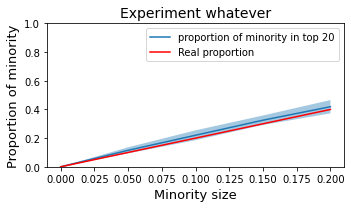

In [13]:
fig =  plt.subplots(1, figsize=(5,3))
plt.plot(size_values, prop_top, label ='proportion of minority in top 20')
plt.fill_between(size_values,[a-b for a,b in zip(prop_top,prop_top_std)],[a+b for a,b in zip(prop_top,prop_top_std)],alpha=0.4)


plt.plot(size_values,size_values*2,'r',label = 'Real proportion')
#plt.xlim(-1,28)
plt.ylim(0,1)
plt.xlabel('Minority size',fontsize=13)
plt.ylabel('Proportion of minority',fontsize=13)

plt.title('Experiment whatever',fontsize=14)
plt.legend()
plt.tight_layout()
#plt.savefig('../../figures/timeline_temporary_track_max.png',dpi=200)

### Experiment3

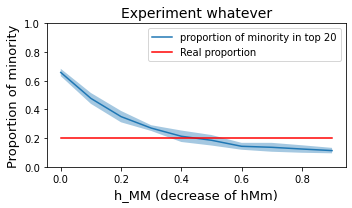

In [110]:
fig =  plt.subplots(1, figsize=(5,3))
plt.plot(h_MM_values, prop_top, label ='proportion of minority in top 20')
plt.fill_between(h_MM_values,[a-b for a,b in zip(prop_top,prop_top_std)],[a+b for a,b in zip(prop_top,prop_top_std)],alpha=0.4)


plt.plot(h_MM_values,(fm1+fm2)*np.ones(10),'r',label = 'Real proportion')
#plt.xlim(-1,28)
plt.ylim(0,1)
plt.xlabel('h_MM (decrease of hMm)',fontsize=13)
plt.ylabel('Proportion of minority',fontsize=13)

plt.title('Experiment whatever',fontsize=14)
plt.legend()
plt.tight_layout()
#plt.savefig('../../figures/timeline_temporary_track_max.png',dpi=200)

### Experiment2

NameError: name 'h_between_values' is not defined

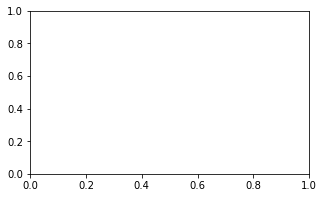

In [14]:
fig =  plt.subplots(1, figsize=(5,3))
plt.plot(h_between_values, prop_top, label ='proportion of minority in top 20')
plt.fill_between(h_between_values,[a-b for a,b in zip(prop_top,prop_top_std)],[a+b for a,b in zip(prop_top,prop_top_std)],alpha=0.4)


plt.plot(h_between_values,(fm1+fm2)*np.ones(10),'r',label = 'Real proportion')
#plt.xlim(-1,28)
plt.ylim(0.15,0.4)
plt.xlabel('h_between (decrease of hmM)',fontsize=13)
plt.ylabel('Proportion of minority',fontsize=13)

plt.title('Experiment whatever',fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('between.png',dpi=200)

### Experiment1

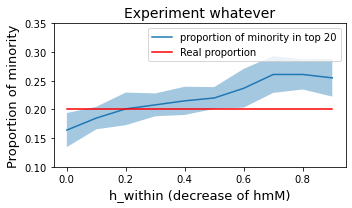

In [99]:
fig =  plt.subplots(1, figsize=(5,3))
plt.plot(h_within_values, prop_top, label ='proportion of minority in top 20')
plt.fill_between(h_within_values,[a-b for a,b in zip(prop_top,prop_top_std)],[a+b for a,b in zip(prop_top,prop_top_std)],alpha=0.4)


plt.plot(h_within_values,(fm1+fm2)*np.ones(10),'r',label = 'Real proportion')
#plt.xlim(-1,28)
plt.ylim(0.1,0.35)
plt.xlabel('h_within (decrease of hmM)',fontsize=13)
plt.ylabel('Proportion of minority',fontsize=13)

plt.title('Experiment whatever',fontsize=14)
plt.legend()
plt.tight_layout()
#plt.savefig('../../figures/timeline_temporary_track_max.png',dpi=200)

## analysis

In [7]:
def draw_graph(g):
    maj_nodelist = []
    min1_nodelist = []
    min2_nodelist = []

    for i in range(len(g.nodes)):
        group = g.nodes[i]['m']
        if group == 0:
            maj_nodelist.append(i)
        elif group == 1:
            min1_nodelist.append(i)
        elif group == 2:
            min2_nodelist.append(i)
        else:
            print("ERROR: group", group)

    subax2 = plt.subplot()
    pos = nx.circular_layout(g)
    nx.draw_networkx(g, nodelist=maj_nodelist, pos=pos, with_labels=False, node_size= 50, node_color='#B6312C')
    nx.draw_networkx(g, nodelist=min1_nodelist, pos=pos, with_labels=False, node_size= 50, node_color='#84CAE7')
    nx.draw_networkx(g, nodelist=min2_nodelist, pos=pos, with_labels=False, node_size= 50, node_color='#136F63')

    plt.show()

In [18]:
#investigate graph... check to see what nx can do
#for g in graphs:
 #   print(g)
    #draw_graph(g)
    #print("average clustering coefficient:", round(nx.algorithms.average_clustering(g),3))